# Flux tower site figure
- This script is used to visualize flux tower sites and climate zone;

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cartopy.crs as ccrs
from matplotlib.colors import ListedColormap
import numpy as np
import matplotlib.patches as mpatches
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LatitudeFormatter, LongitudeFormatter
import xarray as xr
import pandas as pd
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import string

In [2]:
home_path = '/gws/nopw/j04/duicv/yuansun/'
location = 'dataset/koppen_geiger_tif/1991_2020/koppen_geiger_0p1.tif'
image = mpimg.imread(home_path + location)

In [3]:
image

array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       ...,
       [30, 30, 30, ..., 30, 30, 30],
       [30, 30, 30, ..., 30, 30, 30],
       [30, 30, 30, ..., 30, 30, 30]], dtype=uint8)

In [3]:
legend = {
    'Tropical': ['Af', 'Am', 'Aw'],
    'Arid': ['BWh', 'BWk', 'BSh', 'BSk'],
    'Temperate': ['Csa', 'Csb', 'Csc', 'Cwa', 'Cwb', 'Cwc', 'Cfa', 'Cfb', 'Cfc'],
    'Cold': ['Dsa', 'Dsb', 'Dsc', 'Dsd', 'Dwa', 'Dwb', 'Dwc', 'Dwd', 'Dfa', 'Dfb', 'Dfc', 'Dfd'],
    'Polar': ['ET', 'EF']
}

# Group values into zones
zones = {
    0: None,
    1: 'Tropical', 2: 'Tropical', 3: 'Tropical',
    4: 'Arid', 5: 'Arid', 6: 'Arid', 7: 'Arid',
    8: 'Temperate', 9: 'Temperate', 10: 'Temperate',
    11: 'Temperate', 12: 'Temperate', 13: 'Temperate',
    14: 'Temperate', 15: 'Temperate', 16: 'Temperate',
    17: 'Cold', 18: 'Cold', 19: 'Cold', 20: 'Cold',
    21: 'Cold', 22: 'Cold', 23: 'Cold', 24: 'Cold',
    25: 'Cold', 26: 'Cold', 27: 'Cold', 28: 'Cold',
    29: 'Polar', 30: 'Polar'
}

#trop = '#ff9385'
trop = '#ff6485'
arid = '#eb9156' #'#ffd797'
temp = '#246943' #'#aee9aa'
cold = '#a29cf7' #'#87e4e0'

sca_color = [temp, temp, temp, cold, cold, 
            temp, temp, temp, cold, cold,
            temp, temp, cold, cold, trop,
            temp, temp, cold, cold, cold,
            arid]

colors = {
    'Tropical': [255, 100, 133],  # Blue
    'Arid': [235, 145, 86], #[255, 215, 151],  # Red
    'Temperate': [36, 105, 67], #[174, 233, 170],  # Yellow
    'Cold': [162, 156, 247], #[135, 228, 224],  # Cyan
    'Polar': [0, 107, 172], #[135, 166, 228],  # Gray
    None: [255, 255, 255]
}

# Create a colormap
cmap_colors = [colors[zones[i]] for i in range(31)]
cmap = ListedColormap(np.array(cmap_colors) / 255.0)

# Create legend patches and labels
colors.pop(None)   
patch_alpha = 0.45
legend_patches = [mpatches.Patch(facecolor=np.array(colors[zone]) / 255.0, alpha=patch_alpha, edgecolor='none', label=zone) for zone in colors.keys()]

#legend_patches = [mpatches.Patch(color=np.array(colors[zone]) / 255.0, alpha=patch_alpha, edgecolor='none', label=zone) for zone in colors.keys()]  


In [4]:
fsur = home_path + 'dataset/inputdata/lnd/clm2/surfdata_map/release-clm5.0.18/surfdata_0.9x1.25_hist_78pfts_CMIP6_simyr2000_c190214.nc'
ds = xr.open_dataset(fsur)
urban_mask = (ds['PCT_URBAN'] != 0).any(dim='numurbl')
lat  = ds['LATIXY'][:, 0].values
lon  = ds['LONGXY'][0,:].values

In [5]:
linewidth = 0.5
linewidth2 = 1
fontsize = 6
labelfont = 6
labelcolor = '#6b6b6b'
lc0 = '#083550' # dark blue
lc1 = '#006bac' # mid blue
lc2 = '#3da4e3' # light blue
lc3 = '#6c64d4' # purple
lc4 = '#a29cf7' # light purple
lc5 = '#2ec192' # light green
lc6 = '#246943' # dark green
lc7 = '#8a7c1a' # dark yellow
lc8 = '#daa32e' # orange
lc9 = '#eb9156' # pink red
lc10 = '#6e1913'
lc11 = '#a42018'
lc12 = '#f62d18'
dotcolor = '#083550'
alpha=0.075
boundarywidth = 0.5
pad = 1
xwidth = 0.5
length = 4
city = ["AU-Preston","AU-SurreyHills","CA-Sunset","FI-Kumpula","FI-Torni",
          "FR-Capitole","GR-HECKOR","JP-Yoyogi","KR-Jungnang","KR-Ochang",
          "MX-Escandon","NL-Amsterdam","PL-Lipowa","PL-Narutowicza","SG-TelokKurau06",
          "UK-KingsCollege","UK-Swindon","US-Baltimore","US-Minneapolis1","US-Minneapolis2",
          "US-WestPhoenix"]
citylat = [-37.73, -37.8265, 49.2261, 60.2028, 60.1678, 
           43.6035, 35.3361, 35.6645, 37.5907, 36.7197, 
           19.4042, 52.3665, 51.7625, 51.7733, 1.3143, 
           51.5118, 51.5846, 39.4128, 44.9984, 44.9984, 
           33.4839]
citylon = [145.01, 145.099, 236.9216, 24.9611, 24.9387, 
           1.4454, 25.1328, 139.6845, 127.0794, 127.4344, 
           260.8239, 4.8929, 19.4453, 19.4811, 103.9112, 
           359.8833, 358.2019, 283.4785, 266.81164, 266.81164, 
           247.8574]
pattern_alpha = 0.2
padding = 4

dotsize = 15
lcz_type=[6,6,6,5,1,
          2,8,2,2,8,
          3,2,5,5,3,
          2,6,6,6,6,6]

extent = [-180,180,-90,90]
proj = ccrs.PlateCarree()
offset_x = [-2.5, 2.5, 0, -2.5, 2.5, 
            7.5, 0, 0, -2.5, 5,
            0, 0, 7.5, 17.5, 0,
            0, -7.5, 0, -5, 5,
            0] 
offset_y = [10, 10, 10, 10, 10, 
            2.75, 10, 10, 10, 10,
            10, 10, 2.75, 2.75, 10, 
            10, 2.75, 10, 10, 10,
            10]
label_offset = 65

ncol = 6
label_font_color = [trop, arid, temp, cold, lc1, labelcolor, dotcolor]

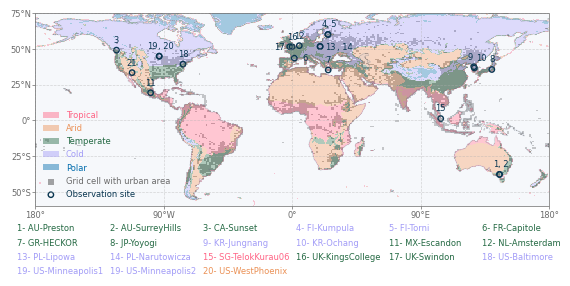

In [14]:
fig, ax = plt.subplots(figsize=(5.5, 2.75),subplot_kw={'projection': ccrs.PlateCarree()})

# Plot the TIFF image with colormap
# Replace image with your actual data
ax.imshow(image, origin='upper', extent=[-180, 180, -90, 90], transform=ccrs.PlateCarree(), cmap=cmap, alpha=patch_alpha)
ax.pcolormesh(lon, lat, urban_mask, cmap='binary',alpha=pattern_alpha)
ax.coastlines(resolution='110m',linestyle='dashed',linewidth=0.2,zorder=2,color=labelcolor,alpha=1)


for i in range(len(city)):
    if citylon[i]>180:
        citylon[i]=citylon[i]-360
    ax.scatter(citylon[i], citylat[i], edgecolor=dotcolor, facecolor='none', marker='o', s=dotsize, zorder=1)

for i, label in enumerate(city):
    if i in [1, 4, 13, 19]:
        string_num = ', '+ str(i+1)
    else: 
        string_num = str(i+1)    
    ax.text(citylon[i]+offset_x[i], citylat[i]+offset_y[i], string_num, color=dotcolor, fontsize=fontsize, ha='center', va='top')
    #ax.text(-175 + label_offset * (i%4), -77.5- 10* (i//4), str(i+1) + '- ' + city[i] + 
            #' (LCZ'+ str(lcz_type[i]) + ')', fontsize=fontsize, color=sca_color[i])
    # set the label of site at the bottem
    if i >=19:
        ax.text(-192.5 + label_offset * (i%ncol), -77.5- 10 * (i//ncol), str(i) + '- ' + city[i], fontsize=fontsize, color=sca_color[i])
    else:  
        ax.text(-192.5 + label_offset * (i%ncol), -77.5- 10 * (i//ncol), str(i+1) + '- ' + city[i], fontsize=fontsize, color=sca_color[i])
            
#land = cfeature.NaturalEarthFeature('physical', 'land', '110m',
#                                    edgecolor='face',
#                                    facecolor=cfeature.COLORS['land'])    
ocean = cfeature.NaturalEarthFeature('physical', 'ocean', '110m',
                                     edgecolor='face',
                                     facecolor=cfeature.COLORS['water'])
ax.set_xticks(np.arange(extent[0], extent[1] +1, 90), crs = proj)
ax.tick_params(axis='both', labelsize=3.5, length=2, pad =0.03, width=boundarywidth)
#ax.set_yticks(np.arange(extent[-2], extent[-1] + 1, 45), crs = proj)
ax.set_yticks([-50,-25, 0, 25, 50, 75], crs = proj)
ax.xaxis.set_major_formatter(LongitudeFormatter(zero_direction_label=False))
ax.yaxis.set_major_formatter(LatitudeFormatter())
ax.tick_params(axis='y', colors=labelcolor, labelsize=labelfont, pad=pad, width=xwidth, length=length/2)
ax.tick_params(axis='x', colors=labelcolor, labelsize=labelfont, pad=pad, width=xwidth, length=length/2)  
#ax.add_feature(land, zorder=0)
ax.add_feature(ocean, alpha=0.1, zorder=0)
ax.set_extent(extent, crs=proj) 
ax.grid(True, which='major', axis='both',linestyle='--',linewidth=linewidth, alpha=0.5)
ax.set_ylim(-60,75)

for spine in ax.spines.values():
    spine.set_linewidth(boundarywidth)
    spine.set_edgecolor(labelcolor)  

plt.subplots_adjust(left=0.045, right=0.98, bottom=0.25, top=0.99, hspace=0.1)

legend_elements = [
    #Patch(facecolor='black', edgecolor='none', label='Urban area', alpha=pattern_alpha),
    Line2D([0], [0], marker='s', color = 'black', alpha = 0, markerfacecolor='black', markersize=6, 
           label='Grid cell with urban area'),
    Line2D([0], [0], marker='o', color = 'w', alpha = 0, markerfacecolor=lc2, markersize=6, 
           label='Observation site'),
]
ax.scatter(-169, -52, color=dotcolor, marker='o', facecolor='none', s=dotsize, zorder=1)
ax.scatter(-169, -43, color='none', marker='s', facecolor='black', alpha = 0.35, s=dotsize, zorder=1)

# Plot legend
legend1 = ax.legend(handles=legend_patches + legend_elements, loc='lower left', fontsize=labelfont,
                    frameon=False, framealpha=1, labelcolor=labelcolor)

for i, text in enumerate(legend1.get_texts()):
    text.set_color(label_font_color[i])
    
plt.show()
output_dir = home_path + '0_lcz_sp/output_analysis/sp/map/'
fig.savefig(output_dir + 'global_map.png', dpi=300)
fig.savefig(output_dir + 'global_map.pdf', dpi=600)

# Description

In [104]:
import rasterio
from rasterio.transform import from_origin
from pyproj import Proj, transform

In [166]:
# Load the image and get the transformation parameters
with rasterio.open(path) as src:
    transform = src.transform
    height = src.height
    width = src.width

# Convert latitude and longitude coordinates to pixel coordinates
def latlon_to_pixel(lat, lon):
    col, row = ~transform * (lon, lat)
    return int(row), int(col)

# Get the value of the point
citylat = [-37.73, -37.8265, 49.2261, 60.2028, 60.1678, 
           43.6035, 35.3361, 35.6645, 37.5907, 36.7197, 
           19.4042, 52.3665, 51.7625, 51.7733, 1.3143, 
           51.5118, 51.5846, 39.4128, 44.9984, 44.9984, 
           33.4839]
citylon = [145.01, 145.099, 236.9216, 24.9611, 24.9387, 
           1.4454, 25.1328, 139.6845, 127.0794, 127.4344, 
           260.8239, 4.8929, 19.4453, 19.4811, 103.9112, 
           359.8833, 358.2019, 283.4785, 266.81164, 266.81164, 
           247.8574]

# Access the image values at the given coordinates
for site, lat, lon in zip(city, citylat, citylon):
    if lon>180:
        lon = lon-360
    row, col = latlon_to_pixel(lat, lon)
    
    point_value = image[row, col]
    print(site + f"Value at lat={lat}, lon={lon}: {point_value}")

# see the legend.txt file for the corresponding values    

AU-PrestonValue at lat=-37.73, lon=145.01: 15
AU-SurreyHillsValue at lat=-37.8265, lon=145.099: 15
CA-SunsetValue at lat=49.2261, lon=-123.07839999999999: 15
FI-KumpulaValue at lat=60.2028, lon=24.9611: 26
FI-TorniValue at lat=60.1678, lon=24.9387: 26
FR-CapitoleValue at lat=43.6035, lon=1.4454: 14
GR-HECKORValue at lat=35.3361, lon=25.1328: 8
JP-YoyogiValue at lat=35.6645, lon=139.6845: 14
KR-JungnangValue at lat=37.5907, lon=127.0794: 21
KR-OchangValue at lat=36.7197, lon=127.4344: 21
MX-EscandonValue at lat=19.4042, lon=-99.17610000000002: 12
NL-AmsterdamValue at lat=52.3665, lon=4.8929: 15
PL-LipowaValue at lat=51.7625, lon=19.4453: 26
PL-NarutowiczaValue at lat=51.7733, lon=19.4811: 26
SG-TelokKurau06Value at lat=1.3143, lon=103.9112: 1
UK-KingsCollegeValue at lat=51.5118, lon=-0.11669999999998026: 15
UK-SwindonValue at lat=51.5846, lon=-1.7980999999999767: 15
US-BaltimoreValue at lat=39.4128, lon=-76.5215: 14
US-Minneapolis1Value at lat=44.9984, lon=-93.18835999999999: 25
US-Minn